# Startup Analysis

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd 
A=pd.read_csv("c:/Users/ullah/Desktop/50_Startups.csv")
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
A.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
A.skew() # very minute skew in data

RND       0.164002
ADMIN    -0.489025
MKT      -0.046472
PROFIT    0.023291
dtype: float64

In [7]:
A.corr()[["PROFIT"]]

,PROFIT
RND,0.972900
ADMIN,0.200717
MKT,0.747766
PROFIT,1.000000


In [19]:
Y=A[["PROFIT"]]
X=A[["RND"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import mean_absolute_error,r2_score
print("MAE:",round(mean_absolute_error(ytest,pred),2))
print("Rsqured:",round(r2_score(ytest,pred),2))

MAE: 6273.34
Rsqured: 0.95


In [58]:
model.intercept_[0] 

48948.409956321666

In [59]:
model.coef_[0]

array([0.86253226])

In [60]:
b0=model.intercept_[0]
b1=model.coef_[0][0]

In [64]:
testdata=pd.DataFrame([xtest.RND]).T
testdata["Y_intercept"]=b0
testdata["slop"]=b1
testdata["Actual_PROFIT"]=ytest.PROFIT
testdata["pred_PROFIT"]=b0+b1*testdata.RND

In [63]:
testdata

,RND,Y_intercept,slop,pred_PROFIT,Actual_PROFIT
32,63408.86,48948.409956,0.862532,103640.597259,97427.84
4,142107.34,48948.409956,0.862532,171520.575050,166187.94
5,131876.90,48948.409956,0.862532,162696.490519,156991.12
31,61136.38,48948.409956,0.862532,101680.509949,97483.56
2,153441.51,48948.409956,0.862532,181296.662313,191050.39
30,61994.48,48948.409956,0.862532,102420.648881,99937.59
0,165349.20,48948.409956,0.862532,191567.429077,192261.83
14,119943.24,48948.409956,0.862532,152403.323793,132602.65
19,86419.70,48948.409956,0.862532,123488.189082,122776.86
35,46014.02,48948.409956,0.862532,88636.986606,96479.51


# calculate error 

In [65]:
testdata["Error"]=testdata.Actual_PROFIT-testdata.pred_PROFIT

In [66]:
from numpy import abs


testdata[["Absolute"]]=abs(testdata.Error)

In [67]:
testdata

,RND,Y_intercept,slop,Actual_PROFIT,pred_PROFIT,Error,Absolute
32,63408.86,48948.409956,0.862532,97427.84,103640.597259,-6212.757259,6212.757259
4,142107.34,48948.409956,0.862532,166187.94,171520.575050,-5332.635050,5332.635050
5,131876.90,48948.409956,0.862532,156991.12,162696.490519,-5705.370519,5705.370519
31,61136.38,48948.409956,0.862532,97483.56,101680.509949,-4196.949949,4196.949949
2,153441.51,48948.409956,0.862532,191050.39,181296.662313,9753.727687,9753.727687
30,61994.48,48948.409956,0.862532,99937.59,102420.648881,-2483.058881,2483.058881
0,165349.20,48948.409956,0.862532,192261.83,191567.429077,694.400923,694.400923
14,119943.24,48948.409956,0.862532,132602.65,152403.323793,-19800.673793,19800.673793
19,86419.70,48948.409956,0.862532,122776.86,123488.189082,-711.329082,711.329082
35,46014.02,48948.409956,0.862532,96479.51,88636.986606,7842.523394,7842.523394


# plot the regression results

Text(0.5, 1.0, 'RND vs PROFT regression line')

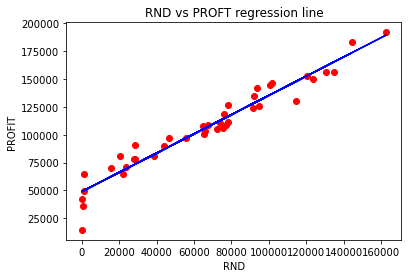

In [68]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain,c="red")
plt.plot(xtrain,b0+b1*xtrain,c="blue")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.title("RND vs PROFT regression line")

# 2.Multiple linear regression

forward selection Regression model

In [11]:
Y=A[["PROFIT"]]
X=A[["RND","MKT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import mean_absolute_error,explained_variance_score
print("MAE:",round(mean_absolute_error(ytest,pred),2))
print("AdjRsqured:",round(explained_variance_score(ytest,pred),2))

MAE: 5837.75
AdjRsqured: 0.96


In [69]:
Y=A[["PROFIT"]]
X=A[["RND","MKT","ADMIN"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import mean_absolute_error,explained_variance_score
print("MAE:",round(mean_absolute_error(ytest,pred),2))
print("AdjRsqured:",round(explained_variance_score(ytest,pred),2))

MAE: 5784.32
AdjRsqured: 0.96
